In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [4]:
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
warnings.filterwarnings('ignore', '^internal gelsd')
np.random.seed(42)

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
x_train_full.shape

(60000, 28, 28)

In [8]:
x_train_full.dtype

dtype('uint8')

In [9]:
# Valid = 유효한
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.0

In [10]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
class_names[y_train[0]]

'Coat'

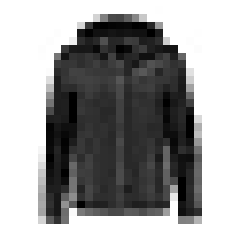

In [12]:
plt.imshow(x_train[0], cmap="binary")
plt.axis('off')
plt.show()

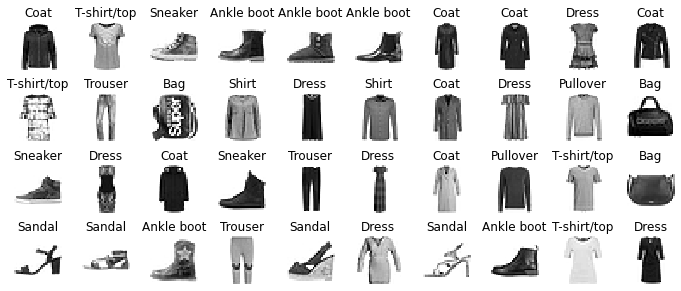

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 스퀸셜 API를 사용하여 모델 만들기

In [14]:
# # Dence = 밀집한, Flatten = 납작해지다
# # 모델 생성
# model = keras.models.Sequential()
# # 1D 배열로 변환한다. X 데이터를 받으면 reshape(-1, 1) 
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# # 300개의 히든레이아웃 생성
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

In [15]:
keras.backend.clear_session()

In [16]:
# 리스트로 한번에 제작이 가능하다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [17]:
model.layers

In [18]:
# 모든 층을 출력함
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer('dense') is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[ 0.00496387,  0.04016556,  0.00636154, ...,  0.05455476,
         0.03275932,  0.02785425],
       [ 0.00894371,  0.00014256, -0.03665498, ...,  0.01023579,
         0.00877437,  0.02002318],
       [ 0.0595891 ,  0.0670422 ,  0.03643747, ..., -0.02001644,
         0.01991063, -0.04927072],
       ...,
       [ 0.02826338, -0.00319996, -0.04228944, ..., -0.01826053,
        -0.07263651,  0.06585568],
       [ 0.06606822, -0.04145617,  0.06910814, ..., -0.00347857,
         0.06223585, -0.00901727],
       [ 0.05895337, -0.02004562,  0.06585732, ...,  0.06441437,
        -0.04445757, -0.03395591]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

In [26]:
# Model Compiler
model.compile(
#               loss = keras.losses.sparse_categorical_crossentropy,
              loss='sparse_categorical_crossentropy',
              # optimizer = 'SGD',
              optimizer = keras.optimizers.SGD(lr = 0.01),
#               metrics = [keras.metrics.sparse_categorical_accuracy]
              metrics=['accuracy']
)

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [27]:
# model Training and Evalution
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.7268 - accuracy: 0.7577 - val_loss: 0.5202 - val_accuracy: 0.8246
Epoch 2/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4931 - accuracy: 0.8284 - val_loss: 0.4433 - val_accuracy: 0.8512
Epoch 3/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4483 - accuracy: 0.8412 - val_loss: 0.4487 - val_accuracy: 0.8450
Epoch 4/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4221 - accuracy: 0.8512 - val_loss: 0.4424 - val_accuracy: 0.8394
Epoch 5/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.4006 - accuracy: 0.8593 - val_loss: 0.3920 - val_accuracy: 0.8690
Epoch 6/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3851 - accuracy: 0.8638 - val_loss: 0.3816 - val_accuracy: 0.8692
Epoch 7/30
55000/55000 [==============================] -

In [28]:
print(history.history['accuracy'])

[0.75774544, 0.8284, 0.8411818, 0.85121816, 0.85934544, 0.86383635, 0.8691273, 0.8737636, 0.8768727, 0.8782727, 0.8819636, 0.8852, 0.88641816, 0.88912725, 0.89216363, 0.89370906, 0.896, 0.8964, 0.8999818, 0.9021091, 0.90305454, 0.9056182, 0.9053091, 0.90843636, 0.91007274, 0.91138184, 0.9138909, 0.9134909, 0.91507274, 0.91694546]


In [29]:
# Training Epochs
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
# Training Parmametor
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

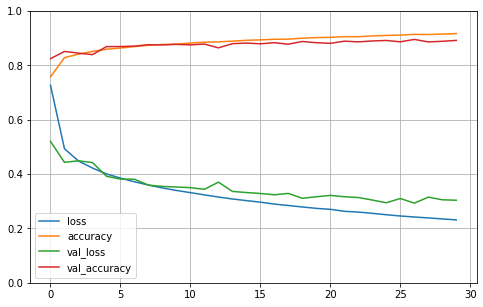

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
# plt.gca().set_xlim(0, 1)
plt.show()

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
# 모델평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.2841 - accuracy: 0.8832


In [35]:
# 분류 예측하기
predictions = model.predict(x_test)
print(predictions[0])
print(class_names[y_test[0]], '=>', class_names[np.argmax(predictions[0])])

[2.6699265e-06 1.2718398e-07 4.2564490e-05 5.0347289e-06 1.5018335e-06
 2.8421667e-03 1.2919312e-05 2.6775004e-02 1.4995723e-03 9.6881843e-01]
Ankle boot => Ankle boot


In [36]:
np.max(history.history['val_accuracy'])

0.8954

In [37]:
for i in range(0, 100):
    print(class_names[y_test[i]], '=>', class_names[np.argmax(predictions[i])])               

Ankle boot => Ankle boot
Pullover => Pullover
Trouser => Trouser
Trouser => Trouser
Shirt => Shirt
Trouser => Trouser
Coat => Coat
Shirt => Shirt
Sandal => Sandal
Sneaker => Sneaker
Coat => Coat
Sandal => Sandal
Sneaker => Sandal
Dress => Dress
Coat => Coat
Trouser => Trouser
Pullover => Pullover
Coat => Pullover
Bag => Bag
T-shirt/top => T-shirt/top
Pullover => Pullover
Sandal => Sandal
Sneaker => Sneaker
Ankle boot => Sandal
Trouser => Trouser
Coat => Pullover
Shirt => Shirt
T-shirt/top => T-shirt/top
Ankle boot => Ankle boot
Dress => Dress
Bag => Bag
Bag => Bag
Dress => Dress
Dress => Dress
Bag => Bag
T-shirt/top => T-shirt/top
Sneaker => Sneaker
Sandal => Sandal
Sneaker => Sneaker
Ankle boot => Ankle boot
Shirt => T-shirt/top
Trouser => Trouser
Dress => Shirt
Sneaker => Sneaker
Shirt => Shirt
Sneaker => Sneaker
Pullover => Pullover
Trouser => Trouser
Pullover => Pullover
Pullover => Shirt
Coat => Coat
Coat => Pullover
Sandal => Sandal
Bag => Bag
Pullover => Pullover
Pullover => Pul

In [38]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1])

In [40]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## 2. 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [42]:
housing = fetch_california_housing()

In [43]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [44]:
# 정규화
scaler = StandardScaler()

In [45]:
# Valid = 검증세트
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

In [47]:
model.compile(loss=keras.losses.mean_squared_error, optimizer='sgd')

In [48]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 80us/sample - loss: 1.4158 - val_loss: 0.5443
Epoch 2/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4915 - val_loss: 0.4871
Epoch 3/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4521 - val_loss: 0.4693
Epoch 4/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4340 - val_loss: 0.4495
Epoch 5/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4183 - val_loss: 0.4485
Epoch 6/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4159 - val_loss: 0.4315
Epoch 7/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4021 - val_loss: 0.4286
Epoch 8/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3953 - val_loss: 0.4198
Epoch 9/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3880 - val_l

In [49]:
mse_test = model.evaluate(x_test, y_test)
x_new = x_test[:3]           #새로운 샘플이라 생각하면됩니다.
y_pred = model.predict(x_new)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

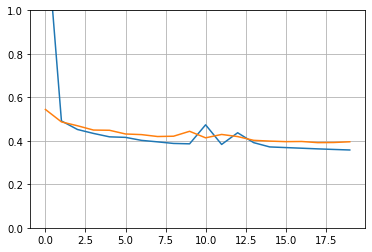

In [50]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 함수형 API를 사용해 복잡한 모델 만들기

In [51]:
input_ = keras.layers.Input(x_train.shape[1:])
hidden1 = keras.layers.Dense(30, 'relu')(input_)
hidden2 = keras.layers.Dense(30, 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [53]:
x_new = x_test[:3]           #새로운 샘플이라 생각하면됩니다.
y_pred = model.predict(x_new)
y_pred

array([[0.01159979],
       [0.06237304],
       [1.3315556 ]], dtype=float32)

In [54]:
# Input_B는 딥러닝을 하고 마지막에 Input_A와 합친 후에 출력한다.
input_A = keras.layers.Input([5], name='wide_input')
input_B = keras.layers.Input([6], name='deep_input')
hidden1 = keras.layers.Dense(30, 'relu')(input_B)
hidden2 = keras.layers.Dense(30, 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [55]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
____________________________________________________________________________________________

In [56]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [57]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

In [58]:
history = model.fit((x_train_A, x_train_B), y_train, epochs=20, validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 85us/sample - loss: 2.3584 - val_loss: 1.0048
Epoch 2/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.8643 - val_loss: 0.7752
Epoch 3/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.7340 - val_loss: 0.6948
Epoch 4/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.6699 - val_loss: 0.6487
Epoch 5/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.6261 - val_loss: 0.6162
Epoch 6/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5946 - val_loss: 0.5899
Epoch 7/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.5709 - val_loss: 0.5713
Epoch 8/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.5530 - val_loss: 0.5568
Epoch 9/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.5385 - val_l

In [59]:
mse_test = model.evaluate((x_test_A, x_test_B), y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [60]:
y_pred = model.predict((x_new_A, x_new_B))

In [61]:
y_pred

array([[0.66739845],
       [1.876569  ],
       [2.9618511 ]], dtype=float32)

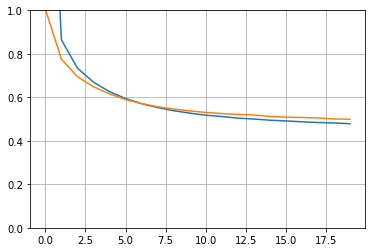

In [62]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [63]:
# Input_B는 딥러닝을 하고 마지막에 Input_A와 합친 후에 출력한다.
# 출력층 2개 메인출력층, 보조출력층ㄴ
input_A = keras.layers.Input([5], name='wide_input')
input_B = keras.layers.Input([6], name='deep_input')
hidden1 = keras.layers.Dense(30, 'relu')(input_B)
hidden2 = keras.layers.Dense(30, 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [64]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
____________________________________________________________________________________________

In [65]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

In [66]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [67]:
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20, validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 118us/sample - loss: 0.9320 - main_output_loss: 0.7929 - aux_output_loss: 2.1813 - val_loss: 0.6201 - val_main_output_loss: 0.5485 - val_aux_output_loss: 1.2636
Epoch 2/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5659 - main_output_loss: 0.5046 - aux_output_loss: 1.1196 - val_loss: 0.5932 - val_main_output_loss: 0.5433 - val_aux_output_loss: 1.0414
Epoch 3/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5635 - main_output_loss: 0.5203 - aux_output_loss: 0.9549 - val_loss: 0.5469 - val_main_output_loss: 0.5064 - val_aux_output_loss: 0.9105
Epoch 4/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5155 - main_output_loss: 0.4796 - aux_output_loss: 0.8373 - val_loss: 0.5036 - val_main_output_loss: 0.4692 - val_aux_output_loss: 0.8125
Epoch 5/20
11610/11610 [==============================] - 1s 57us/

In [79]:
# 모델 저장
model.save('./models/my_keras_model_multi_IO_model.h5')

In [77]:
# 콜백
checkpoint_cv = keras.callbacks.ModelCheckpoint('.\models/my_keras_model_multi_IO_model.h5', save_best_only=True)
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20, validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]), callbacks=[checkpoint_cv])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3290 - main_output_loss: 0.3187 - aux_output_loss: 0.4215 - val_loss: 0.3482 - val_main_output_loss: 0.3365 - val_aux_output_loss: 0.4531
Epoch 2/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3269 - main_output_loss: 0.3167 - aux_output_loss: 0.4186 - val_loss: 0.3632 - val_main_output_loss: 0.3520 - val_aux_output_loss: 0.4638
Epoch 3/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3267 - main_output_loss: 0.3168 - aux_output_loss: 0.4177 - val_loss: 0.3480 - val_main_output_loss: 0.3363 - val_aux_output_loss: 0.4522
Epoch 4/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3266 - main_output_loss: 0.3166 - aux_output_loss: 0.4165 - val_loss: 0.3458 - val_main_output_loss: 0.3345 - val_aux_output_loss: 0.4469
Epoch 5/20
11610/11610 [==============================] - 1s 52us/s

In [72]:
model.save_weights('.\weights\my_keras_model_multi_IO_model.ckpt')

In [73]:
model.load_weights('.\weights\my_keras_model_multi_IO_model.ckpt')

In [80]:
model = keras.models.load_model('.\models\my_keras_model_multi_IO_model.h5')

In [81]:
total_loss, main_loss, aux_loss = model.evaluate([x_test_A, x_test_B], [y_test, y_test])
y_pred, y_pred_aux = model.predict([x_new_A, x_new_B])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [82]:
total_loss, main_loss, aux_loss

(0.321271368884301, 0.31253436, 0.39715925)

In [83]:
y_pred, y_pred_aux

(array([[0.44744098],
        [1.0765269 ],
        [3.9291415 ]], dtype=float32),
 array([[0.52083313],
        [1.3397088 ],
        [3.5334978 ]], dtype=float32))

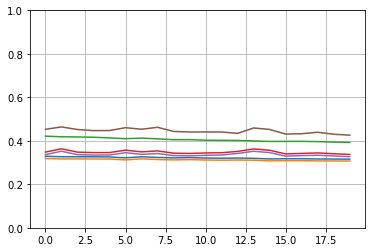

In [84]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 서브클래싱 API로 동적 모델 만들기

In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)         # 표준 매개변수를 처리함(name같은거)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
       
        return main_output, aux_output

In [ ]:
model = WideAndDeepModel()

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
history = model.fit((x_train_A, x_train_B), (y_train, y_train), epochs=10, validation_data=((x_valid_A, x_valid_B), (y_valid, y_valid)))

In [ ]:
# evaluate 오차추정치
total_loss, main_loss, aux_loss = model.evaluate((x_test_A, x_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((x_new_A, x_new_B))

In [ ]:
# 모델 저장 및 복원
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)

In [ ]:
model.save(".\models\my_keras_model.h5")

In [ ]:
model = keras.models.load_model(".\models\my_keras_model.h5")

In [ ]:
model.predict(x_new)

In [ ]:
model.save_weights(".\models\my_keras_weights.ckpt")

In [ ]:
model.load_weights(".\models\my_keras_weights.ckpt")

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 훈련과정에서 콜백하기

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss='mse', optimizer = keras.optimizers.SGD(1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint('.\models\my_keras_model.h5', save_best_only=True)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('.\models\my_keras_model.h5')

In [ ]:
mse_test =model.evaluate(x_test, y_test)

In [ ]:
model.compile(loss = 'mse', optimizer=keras.optimizers.SGD(1e-3))

In [ ]:
# 훈련 조기 종료 (모델이 향상되지 않으면)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
# 체크포인트 저장 (위 checkpoint_cb), 조기 종료(early_stopping_cb)를 callbacks 인자에 넣어둠 (리스트형식)
# epochs  횟수는 상관없음
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
class PrintValTrainRatioCallBack(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallBack()
history = model.fit(x_train , y_train, epochs=1, validation_data=(x_valid, y_valid), callbacks=[val_train_ratio_cb])

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 텐서보드 ↓

In [ ]:
import os

In [ ]:
root_logdir = os.path.join(os.curdir,'my_logs')

In [ ]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [ ]:
run_logdir = get_run_logdir()
run_logdir

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1),
])

In [ ]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(1e-3))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), callbacks=[tensorboard_cb])

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port = 6006

In [ ]:
run_logdir2 = get_run_logdir()
run_logdir2

In [ ]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(1e-5))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), callbacks=[tensorboard_cb])

In [ ]:
help(keras.callbacks.TensorBoard.__init__)

In [ ]:
test_logdir = get_run_logdir()

In [ ]:
writer = tf.summary.create_file_writer(test_logdir)

In [ ]:
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar('my_scaler', np.sin(step/10), step = step)
        data = (np.random.randn(100)+2) * step / 100
        tf.summary.histogram('my_hist', data, buckets=50, step = step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image('my_images', images * step / 1000, step = step)
        texts = ['the step is ' + str(step), 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step = step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave,  tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step = step)

## 하이퍼파라미터 튜닝

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate = 3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

In [ ]:
# wrappers = 포장지
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
# patience = 참을성
keras_reg.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
mse_test = keras_reg.score(x_test, y_test)
y_pred = keras_reg.predict(x_new)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_distribs = {
    'n_hidden' : [0, 1, 2, 3],
    'n_neurons' : np.arange(1, 100),
    'learning_rate' : reciprocal(3e-4, 3e-2),
}

In [ ]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

In [ ]:
rnd_search_cv.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model2 = rnd_search_cv.best_params_
model2

In [ ]:
class DeepModel(keras.models.Model):
    def __init__(self, units, activation, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
       
        return main_output, aux_output

In [ ]:
model2 = DeepModel(30, 'relu')

In [ ]:
model2.compile(loss='mse', optimizer='sgd')
history = model2.fit((x_train_A, x_train_B), (y_train, y_train), epochs=10, validation_data=((x_valid_A, x_valid_B), (y_valid, y_valid)))

In [ ]:
history.params

In [ ]:
model.predict(x_test)